In [1]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import optuna

In [3]:
def prepare_sentiment_data(company_name, filename):
  from google.colab import drive

  drive.mount('/content/gdrive')

  news_data = pd.read_excel(r"/content/gdrive/My Drive/Dataset/"+filename,sheet_name=company_name)
  news_data['date']=pd.to_datetime(news_data['date']).dt.date

  news_data.dropna(inplace=True)
  news_data['sentiment'] = news_data['sentiment'].apply(ast.literal_eval)
  news_data['polarity score'] = news_data['sentiment'].apply(lambda x: x.get('polarity'))

  polarity = news_data.groupby('date')['polarity score'].mean()
  polarity = pd.DataFrame(polarity)
  polarity = polarity.rename(columns={'polarity score':company_name+'_polarity'})

  return polarity

In [4]:
toyota_polarity = prepare_sentiment_data('Toyota', "News_Info.xlsx")
toyota_polarity

Mounted at /content/gdrive


,Toyota_polarity
date,
2015-09-17,0.997000
2015-09-21,0.996000
2015-10-16,0.998000
2016-02-03,0.994000
2016-03-09,1.000000
...,...
2024-05-02,0.999000
2024-05-03,0.724500
2024-05-06,0.927500


In [5]:
apple_polarity = prepare_sentiment_data('Apple', "News_Info.xlsx")
apple_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Apple_polarity
date,
2016-02-19,0.994000
2017-10-05,0.997000
2017-11-27,0.997000
2017-11-30,0.989000
2018-01-31,0.995000
...,...
2024-05-04,0.903100
2024-05-05,0.764286
2024-05-06,0.718313


In [6]:
amazon_polarity = prepare_sentiment_data('Amazon', "News_Info.xlsx")
amazon_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Amazon_polarity
date,
2015-10-22,0.989000
2016-01-11,0.983000
2016-05-05,0.997000
2016-06-16,0.999000
2016-08-11,0.926000
...,...
2024-05-04,0.829667
2024-05-05,0.660286
2024-05-06,0.502969


In [7]:

nissan_polarity = prepare_sentiment_data('Nissan',"News_Info.xlsx")
nissan_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Nissan_polarity
date,
2015-05-20,0.2730
2016-12-09,0.2140
2017-05-05,-0.6490
2017-08-17,0.0000
2017-09-06,0.6250
...,...
2024-04-25,0.3960
2024-04-26,0.9550
2024-04-30,0.1885


In [8]:
honda_polarity = prepare_sentiment_data('Honda',"News_Info.xlsx")
honda_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Honda_polarity
date,
2018-03-12,0.995000
2018-03-16,0.991000
2018-04-11,0.996000
2018-09-26,0.997000
2018-11-02,0.998000
...,...
2024-04-26,0.893667
2024-04-28,0.864000
2024-04-29,0.999000


In [9]:
mazda_polarity = prepare_sentiment_data('Mazda',"News_Info.xlsx")
mazda_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Mazda_polarity
date,
2016-04-14,0.3400
2017-08-03,0.4400
2020-06-16,0.9915
2020-06-30,0.9930
2020-07-03,0.9950
...,...
2024-02-21,0.9490
2024-02-28,0.9990
2024-03-07,0.9990


In [10]:
ford_polarity = prepare_sentiment_data('Ford',"News_Info_part2.xlsx")
ford_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Ford_polarity
date,
2017-10-05,0.997000
2017-10-30,0.034000
2017-11-02,0.758000
2017-11-17,0.396000
2017-11-21,0.170000
...,...
2024-05-04,0.996500
2024-05-05,0.905000
2024-05-06,0.817571


In [11]:
GM_polarity = prepare_sentiment_data('GM',"News_Info_part2.xlsx")
GM_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,GM_polarity
date,
2016-03-11,0.998000
2017-04-10,0.992000
2017-06-02,-0.900000
2017-06-13,-0.477000
2017-06-14,-0.902000
...,...
2024-05-04,0.997000
2024-05-05,0.905000
2024-05-06,0.905500


In [12]:
vw_polarity = prepare_sentiment_data('Volkswagen',"News_Info_part2.xlsx")
vw_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Volkswagen_polarity
date,
2020-04-17,-0.9380
2020-04-27,0.7600
2020-05-01,0.9860
2020-05-26,0.7770
2020-06-03,-0.9930
...,...
2024-04-30,0.2788
2024-05-01,0.9950
2024-05-03,0.9850


In [13]:

bmw_polarity = prepare_sentiment_data('BMW',"News_Info_part2.xlsx")
bmw_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,BMW_polarity
date,
2017-01-10,0.4120
2017-06-29,0.6250
2018-01-09,0.0000
2019-07-18,0.8630
2019-11-12,0.1280
...,...
2024-04-24,0.9960
2024-04-30,0.9950
2024-05-01,0.9970


In [14]:
polarity_data = pd.merge(toyota_polarity,nissan_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,honda_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,mazda_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,ford_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,GM_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,vw_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,bmw_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,apple_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,amazon_polarity,on='date',how='left')
polarity_data.fillna(0,inplace=True)
polarity_data

,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity
date,,,,,,,,,,
2015-09-17,0.997000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-09-21,0.996000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-10-16,0.998000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-02-03,0.994000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-03-09,1.000000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-05-02,0.999000,0.000,0.000,0.0,0.977250,0.881500,0.000,0.0000,0.687296,0.678538
2024-05-03,0.724500,0.990,0.990,0.0,0.542000,0.997000,0.985,0.9915,0.520036,0.807056
2024-05-06,0.927500,0.000,0.000,0.0,0.817571,0.905500,0.000,0.0000,0.718313,0.502969


## First Transformer Model (Encoder Only)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [16]:
# Multi-Head Attention Component
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super(MultiHeadAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads)

    def forward(self, x):
        # x is expected to be (seq_len, batch_size, d_model)
        attn_output, attn_weights = self.attention(x, x, x)
        return attn_output, attn_weights

# Transformer Encoder Layer Component
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, n_heads)
        self.fc1 = nn.Linear(d_model, d_model * 4)
        self.fc2 = nn.Linear(d_model * 4, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, attn_weights = self.mha(x)  # Get attention weights
        x = self.norm1(x + self.dropout1(attn_output))
        fc_output = F.relu(self.fc1(x))
        x = self.norm2(x + self.dropout2(self.fc2(fc_output)))
        return x, attn_weights  # Return attention weights as well

# Complete Transformer Model
class Trans(nn.Module):
    def __init__(self, input_size, trans_hidden_size, trans_kernel_size, seq_len, trans_n_heads, trans_n_layers):
        super(Trans, self).__init__()
        self.input_size = input_size
        self.trans_hidden_size = trans_hidden_size
        self.trans_kernel_size = trans_kernel_size
        self.seq_len = seq_len
        self.n_trans_head = trans_n_heads
        self.trans_n_layers = trans_n_layers

        self.conv = nn.Conv1d(input_size, trans_hidden_size, kernel_size=trans_kernel_size)
        #self.pos_encoder = PositionalEncoding(trans_hidden_size, max_len=seq_len)
        self.transformer_layers = nn.ModuleList(
            [TransformerEncoderLayer(trans_hidden_size, trans_n_heads) for _ in range(trans_n_layers)]
        )
        self.fc = nn.Linear(trans_hidden_size, input_size)


    def forward(self, x):
        x = x.transpose(1, 2)  # (batch_size, input_size, seq_len) -> (batch_size, seq_len, input_size)
        x = F.pad(x, (self.trans_kernel_size - 1, 0))  # Pad for convolution
        x = self.conv(x).permute(2, 0, 1)  # (batch_size, trans_hidden_size, new_seq_len) -> (new_seq_len, batch_size, trans_hidden_size)
        #x = self.pos_encoder(x)

        attn_weights_list = []  # List to store attention weights from each layer
        for layer in self.transformer_layers:
            x, attn_weights = layer(x)
            attn_weights_list.append(attn_weights)  # Collect attention weights

        output = self.fc(x)
        return output, attn_weights_list  # Return output and attention weights

In [17]:
model = Trans(input_size=len(polarity_data), trans_hidden_size=64, trans_kernel_size=3, seq_len=len(polarity_data), trans_n_heads=4, trans_n_layers=2)

input_tensor = torch.tensor(polarity_data.values,dtype=torch.float32).reshape(1,polarity_data.shape[1],polarity_data.shape[0])

output, attention_weights = model(input_tensor)

In [18]:
output, attention_weights = model(input_tensor)

# attention_weights will be a list containing attention weights from each transformer layer
for i, attn in enumerate(attention_weights):
    print(f"Attention weights from layer {i+1}: {attn}")

Attention weights from layer 1: tensor([[[0.1008, 0.1015, 0.1014, 0.1003, 0.1001, 0.1005, 0.0980, 0.0996,
          0.0984, 0.0994],
         [0.1005, 0.0997, 0.1001, 0.1002, 0.1010, 0.1012, 0.0975, 0.0984,
          0.0992, 0.1023],
         [0.0986, 0.1009, 0.0981, 0.1006, 0.1019, 0.1027, 0.0984, 0.0978,
          0.0986, 0.1022],
         [0.1022, 0.1011, 0.0985, 0.1024, 0.0991, 0.1022, 0.0961, 0.1014,
          0.0975, 0.0994],
         [0.1013, 0.1022, 0.0993, 0.0997, 0.1014, 0.1016, 0.0985, 0.0997,
          0.0960, 0.1001],
         [0.1024, 0.1015, 0.1013, 0.0995, 0.1013, 0.1005, 0.0972, 0.0998,
          0.0980, 0.0986],
         [0.1023, 0.1030, 0.0959, 0.1010, 0.1017, 0.0995, 0.0983, 0.1010,
          0.0981, 0.0991],
         [0.1023, 0.0991, 0.0989, 0.1017, 0.1016, 0.1021, 0.0967, 0.0989,
          0.0985, 0.1002],
         [0.1023, 0.1029, 0.0965, 0.1012, 0.1018, 0.1031, 0.0974, 0.1000,
          0.0951, 0.0998],
         [0.1002, 0.0993, 0.1002, 0.1011, 0.1029, 0.1013, 0

In [22]:
attn2 = pd.DataFrame(attn.squeeze(0).detach().numpy(), columns=polarity_data.columns.to_list())
attn2

,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity
0,0.104481,0.112306,0.093643,0.095060,0.091421,0.109644,0.108884,0.107826,0.107648,0.069087
1,0.098225,0.097477,0.102990,0.103586,0.090955,0.096325,0.097871,0.104254,0.128511,0.079806
2,0.084533,0.106655,0.091712,0.088187,0.098507,0.115959,0.101061,0.106820,0.108777,0.097788
3,0.080445,0.118163,0.096334,0.086720,0.095174,0.108275,0.091073,0.119318,0.112735,0.091761
4,0.092088,0.096551,0.099870,0.100717,0.083980,0.106150,0.094935,0.123480,0.111716,0.090513
5,0.093377,0.089283,0.091398,0.112347,0.096568,0.101396,0.092716,0.115255,0.116560,0.091099
6,0.090394,0.110621,0.106048,0.088903,0.076374,0.099679,0.083042,0.144446,0.098229,0.102265
7,0.076756,0.099463,0.093041,0.106755,0.100072,0.101413,0.097379,0.115870,0.124589,0.084662
8,0.079079,0.100293,0.125629,0.084997,0.095203,0.102150,0.088746,0.122667,0.102036,0.099199
9,0.084996,0.114044,0.092191,0.117959,0.099349,0.098707,0.092260,0.111228,0.104104,0.085162


In [23]:
new_columns = [col.replace("_polarity", "") for col in polarity_data.columns]
attn2.columns = new_columns
attn2

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
0,0.104481,0.112306,0.093643,0.095060,0.091421,0.109644,0.108884,0.107826,0.107648,0.069087
1,0.098225,0.097477,0.102990,0.103586,0.090955,0.096325,0.097871,0.104254,0.128511,0.079806
2,0.084533,0.106655,0.091712,0.088187,0.098507,0.115959,0.101061,0.106820,0.108777,0.097788
3,0.080445,0.118163,0.096334,0.086720,0.095174,0.108275,0.091073,0.119318,0.112735,0.091761
4,0.092088,0.096551,0.099870,0.100717,0.083980,0.106150,0.094935,0.123480,0.111716,0.090513
5,0.093377,0.089283,0.091398,0.112347,0.096568,0.101396,0.092716,0.115255,0.116560,0.091099
6,0.090394,0.110621,0.106048,0.088903,0.076374,0.099679,0.083042,0.144446,0.098229,0.102265
7,0.076756,0.099463,0.093041,0.106755,0.100072,0.101413,0.097379,0.115870,0.124589,0.084662
8,0.079079,0.100293,0.125629,0.084997,0.095203,0.102150,0.088746,0.122667,0.102036,0.099199
9,0.084996,0.114044,0.092191,0.117959,0.099349,0.098707,0.092260,0.111228,0.104104,0.085162


In [24]:
attn2.corr()

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
Toyota,1.000000,-0.119140,-0.206076,0.162154,-0.428726,-0.027580,0.465145,-0.216979,0.086502,-0.574510
Nissan,-0.119140,1.000000,-0.133307,-0.345629,-0.040184,0.299502,-0.003625,0.100657,-0.494843,-0.066269
Honda,-0.206076,-0.133307,1.000000,-0.516635,-0.313851,-0.292747,-0.482074,0.429480,-0.335642,0.424939
Mazda,0.162154,-0.345629,-0.516635,1.000000,0.325367,-0.518159,0.114411,-0.352710,0.403679,-0.431004
Ford,-0.428726,-0.040184,-0.313851,0.325367,1.000000,0.171410,0.361898,-0.716235,0.339807,-0.230273
GM,-0.027580,0.299502,-0.292747,-0.518159,0.171410,1.000000,0.497048,-0.228564,-0.217440,0.053007
Volkswagen,0.465145,-0.003625,-0.482074,0.114411,0.361898,0.497048,1.000000,-0.781805,0.377638,-0.768960
BMW,-0.216979,0.100657,0.429480,-0.352710,-0.716235,-0.228564,-0.781805,1.000000,-0.544597,0.645969
Apple,0.086502,-0.494843,-0.335642,0.403679,0.339807,-0.217440,0.377638,-0.544597,1.000000,-0.454887
Amazon,-0.574510,-0.066269,0.424939,-0.431004,-0.230273,0.053007,-0.768960,0.645969,-0.454887,1.000000


In [25]:
new_columns = [col.replace("_polarity", "") for col in polarity_data.columns]
polarity_data.columns = new_columns
polarity_data

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
date,,,,,,,,,,
2015-09-17,0.997000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-09-21,0.996000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-10-16,0.998000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-02-03,0.994000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-03-09,1.000000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-05-02,0.999000,0.000,0.000,0.0,0.977250,0.881500,0.000,0.0000,0.687296,0.678538
2024-05-03,0.724500,0.990,0.990,0.0,0.542000,0.997000,0.985,0.9915,0.520036,0.807056
2024-05-06,0.927500,0.000,0.000,0.0,0.817571,0.905500,0.000,0.0000,0.718313,0.502969


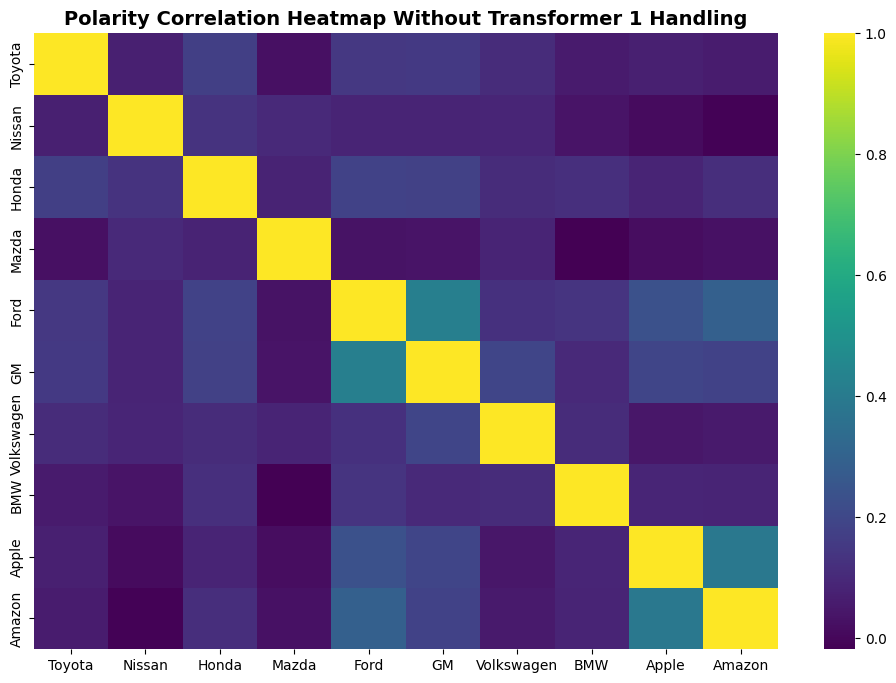

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(polarity_data.corr(), cmap='viridis')
plt.title("Polarity Correlation Heatmap Without Transformer 1 Handling", fontweight='bold', fontsize=14)
plt.savefig("/content/gdrive/My Drive/Dataset/correlation_without_handling.png")
plt.show()

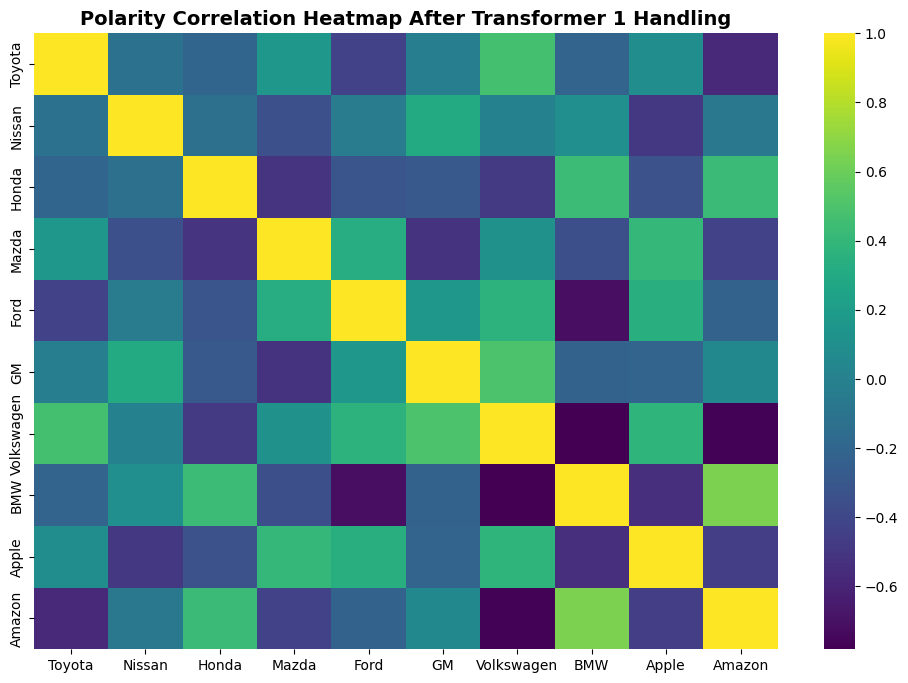

In [27]:
# Create heatmap
# Select the attention weights for the first head and the first example in the batch
#attn_head_0_example_0 = attn[0, :, :]  # Shape: (20, 20)
plt.figure(figsize=(12, 8))
sns.heatmap(attn2.corr(), cmap='viridis')
plt.title("Polarity Correlation Heatmap After Transformer 1 Handling", fontweight='bold', fontsize=14)
plt.savefig("/content/gdrive/My Drive/Dataset/correlation_with_handling.png")
plt.show()

In [28]:
new_polarity_data = pd.DataFrame(output.detach().numpy().squeeze().T,columns=polarity_data.columns, index=polarity_data.index)
new_polarity_data

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
date,,,,,,,,,,
2015-09-17,-1.087680,-1.307291,-0.379766,-0.509905,-0.527804,-0.499747,-0.984507,-0.769905,-0.345251,-0.689808
2015-09-21,-0.522984,-0.498383,-0.306527,-0.318685,-0.226532,0.182070,-0.004494,-0.155804,-0.080258,-0.181506
2015-10-16,0.802713,0.754495,0.438198,0.554888,0.809266,1.240692,0.602507,0.388798,0.037263,0.489277
2016-02-03,0.085907,0.264942,-0.436614,-0.038937,0.332396,0.050329,-0.060754,-0.643770,-0.342728,0.599248
2016-03-09,-0.055001,0.191501,-0.206765,-0.541654,-0.242175,0.296433,-0.697311,-0.570766,-0.510594,-0.805366
...,...,...,...,...,...,...,...,...,...,...
2024-05-02,0.595451,1.220342,1.505644,1.911115,1.929354,1.165146,1.651264,1.333912,1.793433,2.024758
2024-05-03,-0.519537,-0.211009,-0.373938,-0.777963,-0.266122,-0.537206,-0.008915,-1.077780,-0.384070,0.187668
2024-05-06,-0.062461,-0.257895,-0.363885,0.150250,0.256067,0.382149,0.577478,0.110262,-0.169530,0.117219


In [29]:
# import toyota stock price
import yfinance as yf

start_date = "2015-05-01"
end_date = "2024-05-08"

stock_data = yf.Ticker('7203.T')
stock_data = stock_data.history(start=start_date, end=end_date)
stock_data.index = pd.to_datetime(stock_data.index)
stock_data['date'] = stock_data.index
stock_data.reset_index(drop=True, inplace=True)

In [30]:
stock_data.set_index('date',inplace=True)

In [31]:
stock_data.index = stock_data.index.date
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2015-05-01,1247.626847,1250.182861,1234.696550,1250.182861,37228500,0.0,0.0
2015-05-07,1240.560414,1242.815706,1233.493909,1234.997437,40812500,0.0,0.0
2015-05-08,1234.696613,1255.144547,1231.388834,1244.770264,44073500,0.0,0.0
2015-05-11,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0
2015-05-12,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0


In [32]:
# run this code when using other models except Dual Transformer
stock_data = pd.merge(stock_data, polarity_data,left_index=True,right_index=True,how='left').fillna(0)

In [ ]:
stock_data = pd.merge(stock_data,new_polarity_data,left_index=True,right_index=True,how='left').fillna(0)
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity
2015-05-01,1264.370254,1266.960571,1251.266430,1266.960571,37228500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-07,1257.208433,1259.493989,1250.047096,1251.570801,40812500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-08,1251.266379,1271.988727,1247.914210,1261.475220,44073500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-11,1279.911505,1279.911505,1251.722977,1254.770386,55217000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-12,1254.770627,1262.236816,1248.218717,1262.236816,35281500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0,0.362180,-0.269002,0.355722,0.356553,0.198277,0.181931,0.042747,0.220640,0.336951,0.768561
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0,-0.570574,-0.142908,0.080140,0.047374,0.164228,-0.268005,-0.557977,0.627264,-0.053143,0.007171
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0,1.051604,1.373436,0.170351,0.273395,-0.331673,0.420415,0.844572,0.163939,0.057452,-0.264915
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0,0.165227,0.039224,-0.434017,0.038603,-0.800555,-0.119906,0.093418,-0.008557,-0.366351,-0.330603


### Stock Price Prediction

In [61]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
import torch.utils.data as data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from torch.nn.utils.parametrizations import weight_norm
import math

In [62]:
# split data into training and testing

def Split_data(X, y, window, predict_forward):
    #X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    training_data_len = int(np.ceil( len(y) * .7 ))

    train_data = X[0:int(training_data_len)]
    train_target = y[0:int(training_data_len)]

    #Feature Scaling
    scaler_train = MinMaxScaler(feature_range=(0,1))
    train_data = scaler_train.fit_transform(train_data)
    scaler_train_target = MinMaxScaler(feature_range=(0,1))
    train_target = scaler_train_target.fit_transform(train_target.reshape(-1, 1))

    # Split the data into x_train and y_train data sets
    X_train = []
    y_train = []

    for i in range(len(train_data) - window - predict_forward + 1):
        X_train.append(train_data[i:(i+window)])
        y_train.append(train_target[(i+window):(i+window+predict_forward)])

    X_train = np.array(X_train)
    y_train = np.array(y_train)


    #X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2]))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))

    X_test = []
    y_test = []

    test_data = X[training_data_len-window:]
    test_target = y[training_data_len-window:]

    #Feature Scaling
    scaler_test = MinMaxScaler(feature_range=(0,1))
    test_data = scaler_test.fit_transform(test_data)
    scaler_test_target = MinMaxScaler(feature_range=(0,1))
    test_target = scaler_test_target.fit_transform(test_target.reshape(-1, 1))

    for i in range(len(test_data) - window - predict_forward + 1):
        X_test.append(test_data[i:(i+window)])
        y_test.append(test_target[(i+window):(i+window+predict_forward)])

    X_test = np.array(X_test)
    y_test = np.array(y_test)


    #X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],X_test.shape[2]))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))


    return X_train, y_train, X_test, y_test, training_data_len, scaler_test_target

In [63]:
def prepare_data(data, feature_list, window_size,predict_forward):
  X = data[feature_list]
  y = data['Close'].values
  X_train, y_train, X_test, y_test, training_data_len, scaler_test_target  = Split_data(X, y, window_size,predict_forward)

  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_test = torch.tensor(X_test, dtype=torch.float32)

  y_train = torch.tensor(y_train, dtype=torch.float32)
  y_test = torch.tensor(y_test, dtype=torch.float32)

  return X_train, y_train, X_test, y_test

In [64]:
window_size = 5
predict_forward = 1

In [65]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Toyota', 'Nissan', 'Honda', 'Mazda', 'Ford', 'GM', 'Volkswagen', 'BMW',
       'Apple', 'Amazon', 'date'],
      dtype='object')

In [66]:
# feature inputs
X = ['Close','Toyota', 'Nissan', 'Honda', 'Mazda', 'Ford', 'GM', 'Volkswagen', 'BMW',
       'Apple', 'Amazon']

In [67]:
X_train, y_train, X_test, y_test = prepare_data(stock_data, X, window_size, predict_forward)

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([1551, 5, 11]),
 torch.Size([1551, 1]),
 torch.Size([666, 5, 11]),
 torch.Size([666, 1]))

In [69]:
stock_data['date'] = stock_data.index
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon,date
2015-05-01,1247.626847,1250.182861,1234.696550,1250.182861,37228500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,2015-05-01
2015-05-07,1240.560414,1242.815706,1233.493909,1234.997437,40812500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,2015-05-07
2015-05-08,1234.696613,1255.144547,1231.388834,1244.770264,44073500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,2015-05-08
2015-05-11,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,2015-05-11
2015-05-12,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,2015-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0,0.838250,0.9550,0.893667,0.0,0.703250,0.574545,0.9980,0.000,0.513125,0.630143,2024-04-26
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0,0.904500,0.1885,0.000000,0.0,0.991333,0.993667,0.2788,0.995,0.616087,0.697914,2024-04-30
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0,0.755000,0.0000,0.000000,0.0,0.574000,0.913333,0.9950,0.997,0.665312,0.740286,2024-05-01
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0,0.999000,0.0000,0.000000,0.0,0.977250,0.881500,0.0000,0.000,0.687296,0.678538,2024-05-02


# Transformer

In [42]:
"Transformer 2 (Encoder + Decoder)"

def compared_version(ver1, ver2):
    """
    :param ver1
    :param ver2
    :return: ver1< = >ver2 False/True
    """
    list1 = str(ver1).split(".")
    list2 = str(ver2).split(".")

    for i in range(len(list1)) if len(list1) < len(list2) else range(len(list2)):
        if int(list1[i]) == int(list2[i]):
            pass
        elif int(list1[i]) < int(list2[i]):
            return -1
        else:
            return 1

    if len(list1) == len(list2):
        return True
    elif len(list1) < len(list2):
        return False
    else:
        return True


class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]


class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if compared_version(torch.__version__, '1.5.0') else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x


class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()


class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        weekday_size = 365
        day_size = 365
        month_size = 365

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding

        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()

        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return weekday_x + day_x + month_x


class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6, 'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)


class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):
        x = self.value_embedding(x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

In [43]:
from math import sqrt


class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                    torch.arange(H)[None, :, None],
                    index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)

    @property
    def mask(self):
        return self._mask


class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1. / sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)

        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)

        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads, d_keys=None,
                 d_values=None):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model // n_heads)
        d_values = d_values or (d_model // n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        out = out.view(B, L, -1)

        return self.out_projection(out), attn


In [44]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=2,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1, 2)
        return x


class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        new_x, attn = self.attention(
            x, x, x,
            attn_mask=attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm2(x + y), attn


class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns


class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm3(x + y)


class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None, projection=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer
        self.projection = projection

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        if self.projection is not None:
            x = self.projection(x)
        return x

In [45]:
class Model(nn.Module):
    """
    Vanilla Transformer with O(L^2) complexity
    """
    def __init__(self, pred_len=predict_forward, output_attention=False, enc_in=X_train.shape[-1], dec_in=1, c_out=1, d_model=512, embed='fixed',
                 freq='h', dropout=0.0, factor=5, n_heads=8, d_ff=512, activation='gelu', e_layers=3, d_layers=2):
        super(Model, self).__init__()
        self.pred_len = pred_len
        self.output_attention = output_attention

        # Embedding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq,
                                           dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq,
                                           dropout)
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout,
                                      output_attention=output_attention), d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(
                        FullAttention(True, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model),
            projection=nn.Linear(d_model, c_out, bias=True)
        )

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):

        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)

        if self.output_attention:
            return dec_out[:, -self.pred_len:, :], attns
        else:
            return dec_out[:, -self.pred_len:, :]  # [B, L, D]

In [46]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_size = 0.7
s_len = X_train.shape[-1]
pre_len = predict_forward
batch_size = 64
lr = 5e-5
epochs = 50

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


def create_data(datas, s_len):

    values = []
    labels = []

    lens = datas.shape[0]
    datas = datas.values
    for index in range(0, lens-pre_len-s_len):
        value = datas[index:index+s_len, [stock_data.columns.get_loc('date')]+[stock_data.columns.get_loc(col) for col in X]]
        label = datas[index+s_len-pre_len:index+s_len+pre_len, [stock_data.columns.get_loc('date'), stock_data.columns.get_loc('Close')]]

        values.append(value)
        labels.append(label)

    return values, labels



def read_data(data, s_len):

    xs = data.values[:, [stock_data.columns.get_loc(col) for col in X]]
    ys = data.values[:, stock_data.columns.get_loc('Close')]

    x_scaler.fit_transform(xs)
    y_scaler.fit_transform(ys[:, None])

    values, labels = create_data(data, s_len)

    train_x, test_x, train_y, test_y = train_test_split(values, labels, train_size=train_size)

    return train_x, test_x, train_y, test_y


class AmaData(Dataset):
    def __init__(self, values, labels):

        self.values, self.labels = values, labels

    def __len__(self):
        return len(self.values)

    def create_time(self, data):

        time = data[:, 0]
        time = pd.to_datetime(time)

        week = np.int32(time.dayofweek)[:, None]
        month = np.int32(time.month)[:, None]
        day = np.int32(time.day)[:, None]
        time_data = np.concatenate([month, week, day], axis=-1)

        return time_data

    def __getitem__(self, item):

        value = self.values[item]
        label = self.labels[item]

        value_t = self.create_time(value)
        label_t = self.create_time(label)

        value = x_scaler.transform(value[:, 1:])
        label = y_scaler.transform(label[:, 1][:, None])
        value = np.float32(value)
        label = np.float32(label)
        return value, label, value_t, label_t


def TransformerTrain(data, s_len):

    train_x, test_x, train_y, test_y = read_data(data, s_len)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    model = Model()
    model.train()

    MSE = nn.MSELoss()
    MAE = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pbar = tqdm(train_data)
        for step, (x, y ,xt, yt) in enumerate(pbar):
            mask = torch.zeros_like(y)[:, pre_len:]

            dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

            #dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)   #target sequence shifted right

            logits = model(x, xt, dec_y, yt)

            loss_mse = MSE(logits, y[:, pre_len:])
            loss_mae = MAE(logits, y[:, pre_len:])

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()

            s = "train ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

            pbar.set_description(s)

        model.eval()
        with torch.no_grad():

            pbar = tqdm(test_data)
            predictions = []
            actual = []
            for step, (x, y, xt, yt) in enumerate(pbar):
                mask = torch.zeros_like(y)[:, pre_len:]

                #dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)
                dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

                logits = model(x, xt, dec_y, yt)

                predictions.append(y_scaler.inverse_transform(logits.numpy().squeeze().reshape(-1, 1)))
                actual.append(y_scaler.inverse_transform(y[:, pre_len:].numpy().squeeze().reshape(-1, 1)))

                loss_mse = MSE(logits, y[:, pre_len:])
                loss_mae = MAE(logits, y[:, pre_len:])

                s = "test ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

                pbar.set_description(s)

        model.train()

    return loss_mse, loss_mae, logits, predictions, actual

In [ ]:
tf_mse, tf_mae,logits, predictions, actual = TransformerTrain(stock_data, window_size)

train ==> epoch:0 - step:24 - MSE:0.0032649280037730932 - MAE:0.04329206421971321: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
test ==> epoch:0 - step:10 - MSE:0.016323789954185486 - MAE:0.10395406931638718: 100%|██████████| 11/11 [00:02<00:00,  3.92it/s]
train ==> epoch:1 - step:24 - MSE:0.004918641876429319 - MAE:0.06246854364871979: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s]
test ==> epoch:1 - step:10 - MSE:0.0034839631989598274 - MAE:0.052184801548719406: 100%|██████████| 11/11 [00:03<00:00,  3.00it/s]
train ==> epoch:2 - step:24 - MSE:0.0003634504973888397 - MAE:0.0157539751380682: 100%|██████████| 25/25 [00:15<00:00,  1.61it/s]
test ==> epoch:2 - step:10 - MSE:0.001022832002490759 - MAE:0.026465490460395813: 100%|██████████| 11/11 [00:02<00:00,  3.96it/s]
train ==> epoch:3 - step:24 - MSE:0.000578454986680299 - MAE:0.017411164939403534: 100%|██████████| 25/25 [00:15<00:00,  1.56it/s]
test ==> epoch:3 - step:10 - MSE:0.00046567083336412907 - MAE:0.018226472660899162: 100%

In [ ]:
tf_mse, tf_mae

(tensor(0.0001), tensor(0.0082))

# Informer

In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                    kernel_size=3, padding=padding, padding_mode='circular')
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight,mode='fan_in',nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1,2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x)

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        weekday_size = 356
        day_size = 356
        month_size = 356

        Embed = FixedEmbedding if embed_type=='fixed' else nn.Embedding

        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):

        weekday_x = self.weekday_embed(x[:,:,1])
        day_x = self.day_embed(x[:, :, -1])
        month_x = self.month_embed(x[:, :, 0])

        return weekday_x + day_x + month_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h':4, 't':5, 's':6, 'm':1, 'a':1, 'w':2, 'd':3, 'b':3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type, freq=freq) if embed_type!='timeF' else TimeFeatureEmbedding(d_model=d_model, embed_type=embed_type, freq=freq)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):

        x = self.value_embedding(x) + self.position_embedding(x) + self.temporal_embedding(x_mark)

        return self.dropout(x)

In [ ]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=padding,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1,2)
        return x

class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        # x = x + self.dropout(self.attention(
        #     x, x, x,
        #     attn_mask = attn_mask
        # ))
        new_x, attn = self.attention(
            x, x, x,
            attn_mask = attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm2(x+y), attn

class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x, attn_mask=attn_mask)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns

class EncoderStack(nn.Module):
    def __init__(self, encoders, inp_lens):
        super(EncoderStack, self).__init__()
        self.encoders = nn.ModuleList(encoders)
        self.inp_lens = inp_lens

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        x_stack = []; attns = []
        for i_len, encoder in zip(self.inp_lens, self.encoders):
            inp_len = x.shape[1]//(2**i_len)
            x_s, attn = encoder(x[:, -inp_len:, :])
            x_stack.append(x_s); attns.append(attn)
        x_stack = torch.cat(x_stack, -2)

        return x_stack, attns

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm3(x+y)

class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        return x

In [ ]:
from math import sqrt


class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                    torch.arange(H)[None, :, None],
                    index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)

    @property
    def mask(self):
        return self._mask

class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1./sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)
        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)

        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class ProbAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(ProbAttention, self).__init__()
        self.factor = factor
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def _prob_QK(self, Q, K, sample_k, n_top): # n_top: c*ln(L_q)
        # Q [B, H, L, D]
        B, H, L_K, E = K.shape
        _, _, L_Q, _ = Q.shape

        # calculate the sampled Q_K
        K_expand = K.unsqueeze(-3).expand(B, H, L_Q, L_K, E)
        index_sample = torch.randint(L_K, (L_Q, sample_k)) # real U = U_part(factor*ln(L_k))*L_q
        K_sample = K_expand[:, :, torch.arange(L_Q).unsqueeze(1), index_sample, :]

        Q_K_sample = torch.matmul(Q.unsqueeze(-2), K_sample.transpose(-2, -1)).squeeze(-2)

        # find the Top_k query with sparisty measurement
        M = Q_K_sample.max(-1)[0] - torch.div(Q_K_sample.sum(-1), L_K)
        M_top = M.topk(n_top, sorted=False)[1] # 按行求出每一行的最大的前两个值

        # use the reduced Q to calculate Q_K
        Q_reduce = Q[torch.arange(B)[:, None, None],
                     torch.arange(H)[None, :, None],
                     M_top, :] # factor*ln(L_q)
        Q_K = torch.matmul(Q_reduce, K.transpose(-2, -1)) # factor*ln(L_q)*L_k

        return Q_K, M_top

    def _get_initial_context(self, V, L_Q):
        B, H, L_V, D = V.shape
        if not self.mask_flag:
            # V_sum = V.sum(dim=-2)
            V_sum = V.mean(dim=-2)
            contex = V_sum.unsqueeze(-2).expand(B, H, L_Q, V_sum.shape[-1]).clone()
        else: # use mask
            assert(L_Q == L_V) # requires that L_Q == L_V, i.e. for self-attention only
            contex = V.cumsum(dim=-2)
        return contex

    def _update_context(self, context_in, V, scores, index, L_Q, attn_mask):
        B, H, L_V, D = V.shape

        if self.mask_flag:
            attn_mask = ProbMask(B, H, L_Q, index, scores, device=V.device)
            scores.masked_fill_(attn_mask.mask, -np.inf)

        attn = torch.softmax(scores, dim=-1) # nn.Softmax(dim=-1)(scores)

        context_in[torch.arange(B)[:, None, None],
                   torch.arange(H)[None, :, None],
                   index, :] = torch.matmul(attn, V).type_as(context_in)
        if self.output_attention:
            attns = (torch.ones([B, H, L_V, L_V])/L_V).type_as(attn).to(attn.device)
            attns[torch.arange(B)[:, None, None], torch.arange(H)[None, :, None], index, :] = attn
            return (context_in, attns)
        else:
            return (context_in, None)

    def forward(self, queries, keys, values, attn_mask):
        B, L_Q, H, D = queries.shape
        _, L_K, _, _ = keys.shape

        queries = queries.transpose(2,1)
        keys = keys.transpose(2,1)
        values = values.transpose(2,1)

        U_part = self.factor * np.ceil(np.log(L_K)).astype('int').item() # c*ln(L_k)
        u = self.factor * np.ceil(np.log(L_Q)).astype('int').item() # c*ln(L_q)

        U_part = U_part if U_part<L_K else L_K
        u = u if u<L_Q else L_Q

        scores_top, index = self._prob_QK(queries, keys, sample_k=U_part, n_top=u)

        # add scale factor
        scale = self.scale or 1./sqrt(D)
        if scale is not None:
            scores_top = scores_top * scale
        # get the context
        context = self._get_initial_context(values, L_Q)
        # update the context with selected top_k queries
        context, attn = self._update_context(context, values, scores_top, index, L_Q, attn_mask)

        return context.transpose(2,1).contiguous(), attn


class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads,
                 d_keys=None, d_values=None, mix=False):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model//n_heads)
        d_values = d_values or (d_model//n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads
        self.mix = mix

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        if self.mix:
            out = out.transpose(2,1).contiguous()
        out = out.view(B, L, -1)

        return self.out_projection(out), attn

In [ ]:
class Informer(nn.Module): # need to change enc_in based on the number of features
    def __init__(self, enc_in=X_train.shape[-1], dec_in=1, c_out=1, out_len=predict_forward,
                factor=5, d_model=512, n_heads=8, e_layers=3, d_layers=2, d_ff=512,
                dropout=0.0, attn='prob', embed='fixed', freq='h', activation='gelu',
                output_attention = False, distil=True, mix=True,
                device=torch.device('cuda:0')):
        super(Informer, self).__init__()
        self.pred_len = out_len
        self.attn = attn
        self.output_attention = output_attention

        # Encoding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq, dropout)
        # Attention
        Attn = ProbAttention if attn=='prob' else FullAttention
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(Attn(False, factor, attention_dropout=dropout, output_attention=output_attention),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            [
                ConvLayer(
                    d_model
                ) for l in range(e_layers-1)
            ] if distil else None,
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(Attn(True, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=mix),
                    AttentionLayer(FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # self.end_conv1 = nn.Conv1d(in_channels=label_len+out_len, out_channels=out_len, kernel_size=1, bias=True)
        # self.end_conv2 = nn.Conv1d(in_channels=d_model, out_channels=c_out, kernel_size=1, bias=True)
        self.projection = nn.Linear(d_model, c_out, bias=True)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)
        dec_out = self.projection(dec_out)

        # dec_out = self.end_conv1(dec_out)
        # dec_out = self.end_conv2(dec_out.transpose(2,1)).transpose(1,2)
        if self.output_attention:
            return dec_out[:,-self.pred_len:,:], attns
        else:
            return dec_out[:,-self.pred_len:,:] # [B, L, D]


class InformerStack(nn.Module):
    def __init__(self, enc_in, dec_in, c_out, seq_len, label_len, out_len,
                factor=5, d_model=512, n_heads=8, e_layers=[3,2,1], d_layers=2, d_ff=512,
                dropout=0.0, attn='prob', embed='fixed', freq='h', activation='gelu',
                output_attention = False, distil=True, mix=True,
                device=torch.device('cuda:0')):
        super(InformerStack, self).__init__()
        self.pred_len = out_len
        self.attn = attn
        self.output_attention = output_attention

        # Encoding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq, dropout)
        # Attention
        Attn = ProbAttention if attn=='prob' else FullAttention
        # Encoder

        inp_lens = list(range(len(e_layers))) # [0,1,2,...] you can customize here
        encoders = [
            Encoder(
                [
                    EncoderLayer(
                        AttentionLayer(Attn(False, factor, attention_dropout=dropout, output_attention=output_attention),
                                    d_model, n_heads, mix=False),
                        d_model,
                        d_ff,
                        dropout=dropout,
                        activation=activation
                    ) for l in range(el)
                ],
                [
                    ConvLayer(
                        d_model
                    ) for l in range(el-1)
                ] if distil else None,
                norm_layer=torch.nn.LayerNorm(d_model)
            ) for el in e_layers]
        self.encoder = EncoderStack(encoders, inp_lens)
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(Attn(True, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=mix),
                    AttentionLayer(FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # self.end_conv1 = nn.Conv1d(in_channels=label_len+out_len, out_channels=out_len, kernel_size=1, bias=True)
        # self.end_conv2 = nn.Conv1d(in_channels=d_model, out_channels=c_out, kernel_size=1, bias=True)
        self.projection = nn.Linear(d_model, c_out, bias=True)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)
        dec_out = self.projection(dec_out)

        # dec_out = self.end_conv1(dec_out)
        # dec_out = self.end_conv2(dec_out.transpose(2,1)).transpose(1,2)
        if self.output_attention:
            return dec_out[:,-self.pred_len:,:], attns
        else:
            return dec_out[:,-self.pred_len:,:] # [B, L, D]

In [ ]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_size = 0.7
s_len = window_size
pre_len = predict_forward
batch_size = 8
lr = 5e-5
epochs = 20

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


def create_data(datas, s_len):

    values = []
    labels = []

    lens = datas.shape[0]
    datas = datas.values
    for index in range(0, lens-pre_len-s_len):
        value = datas[index:index+s_len, [stock_data.columns.get_loc('date')]+[stock_data.columns.get_loc(col) for col in X]]
        label = datas[index+s_len-pre_len:index+s_len+pre_len, [stock_data.columns.get_loc('date'), stock_data.columns.get_loc('Close')]]

        values.append(value)
        labels.append(label)

    return values, labels



def read_data(data, s_len):

    xs = data.values[:, [stock_data.columns.get_loc(col) for col in X]]
    ys = data.values[:, stock_data.columns.get_loc('Close')]

    x_scaler.fit_transform(xs)
    y_scaler.fit_transform(ys[:, None])

    values, labels = create_data(data, s_len)

    train_x, test_x, train_y, test_y = train_test_split(values, labels, train_size=train_size)

    return train_x, test_x, train_y, test_y


class AmaData(Dataset):
    def __init__(self, values, labels):

        self.values, self.labels = values, labels

    def __len__(self):
        return len(self.values)

    def create_time(self, data):

        time = data[:, 0]
        time = pd.to_datetime(time)

        week = np.int32(time.dayofweek)[:, None]
        month = np.int32(time.month)[:, None]
        day = np.int32(time.day)[:, None]
        time_data = np.concatenate([month, week, day], axis=-1)

        return time_data

    def __getitem__(self, item):

        value = self.values[item]
        label = self.labels[item]

        value_t = self.create_time(value)
        label_t = self.create_time(label)

        value = x_scaler.transform(value[:, 1:])
        label = y_scaler.transform(label[:, 1][:, None])
        value = np.float32(value)
        label = np.float32(label)
        return value, label, value_t, label_t


def InformerTrain(data, s_len):

    train_x, test_x, train_y, test_y = read_data(data, s_len)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    model = Informer()
    model.train()

    MSE = nn.MSELoss()
    MAE = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pbar = tqdm(train_data)
        for step, (x, y ,xt, yt) in enumerate(pbar):
            mask = torch.zeros_like(y)[:, pre_len:]

            dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

            logits = model(x, xt, dec_y, yt)

            loss_mse = MSE(logits, y[:, pre_len:])
            loss_mae = MAE(logits, y[:, pre_len:])

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()

            s = "train ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

            pbar.set_description(s)

        model.eval()
        with torch.no_grad():

            pbar = tqdm(test_data)
            predictions = []
            actual = []
            for step, (x, y, xt, yt) in enumerate(pbar):
                mask = torch.zeros_like(y)[:, pre_len:]

                dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

                logits = model(x, xt, dec_y, yt)

                predictions.append(y_scaler.inverse_transform(logits.numpy().squeeze().reshape(-1, 1)))
                actual.append(y_scaler.inverse_transform(y[:, pre_len:].numpy().squeeze().reshape(-1, 1)))

                loss_mse = MSE(logits, y[:, pre_len:])
                loss_mae = MAE(logits, y[:, pre_len:])

                s = "test ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

                pbar.set_description(s)

        model.train()

    return loss_mse, loss_mae, logits, predictions, actual

In [ ]:
loss_mse, loss_mae,logits, predictions, actual = InformerTrain(stock_data, window_size)

train ==> epoch:0 - step:193 - MSE:0.004238561727106571 - MAE:0.04871334508061409: 100%|██████████| 194/194 [00:55<00:00,  3.51it/s]
test ==> epoch:0 - step:83 - MSE:0.001437725150026381 - MAE:0.03791734576225281: 100%|██████████| 84/84 [00:05<00:00, 14.07it/s]
train ==> epoch:1 - step:193 - MSE:0.000660607242025435 - MAE:0.01974598504602909: 100%|██████████| 194/194 [00:46<00:00,  4.15it/s]
test ==> epoch:1 - step:83 - MSE:0.000872701988555491 - MAE:0.029541529715061188: 100%|██████████| 84/84 [00:06<00:00, 12.69it/s]
train ==> epoch:2 - step:193 - MSE:0.0010780652519315481 - MAE:0.02917390502989292: 100%|██████████| 194/194 [00:46<00:00,  4.15it/s]
test ==> epoch:2 - step:83 - MSE:0.0009408400510437787 - MAE:0.030673116445541382: 100%|██████████| 84/84 [00:05<00:00, 14.61it/s]
train ==> epoch:3 - step:193 - MSE:0.0005376542685553432 - MAE:0.01867837645113468: 100%|██████████| 194/194 [00:46<00:00,  4.19it/s]
test ==> epoch:3 - step:83 - MSE:1.5381796401925385e-05 - MAE:0.003921963274

### hyper-parameter optim

In [ ]:
# Objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    d_model = trial.suggest_categorical("d_model", [128, 256, 512])
    dropout = trial.suggest_uniform("dropout", 0.0, 0.3)
    n_heads = trial.suggest_int("n_heads", 4, 8)
    d_ff = trial.suggest_int("d_ff", 256, 1024, step=128)
    e_layers = trial.suggest_int("e_layers", 1, 4)
    d_layers = trial.suggest_int("d_layers", 1, 3)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
    batch_size = trial.suggest_int("batch_size", 16, 128, step=32)

    epochs = 20  # Adjust number of epochs for trials

        # Print the parameters for this trial
    print(f"Trial parameters: d_model={d_model}, dropout={dropout}, n_heads={n_heads}, "
          f"d_ff={d_ff}, e_layers={e_layers}, d_layers={d_layers}, lr={lr}, batch_size={batch_size}")

    train_x, test_x, train_y, test_y = read_data(stock_data, window_size)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)


    # Initialize model, optimizer, and criterion
    model = Informer(d_model=d_model, dropout=dropout, n_heads=n_heads, d_ff=d_ff, e_layers=e_layers, d_layers=d_layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # Training loop
    model.train()
    for epoch in range(epochs):
        for x, y, xt, yt in tqdm(train_data):
            mask = torch.zeros_like(y)[:, pre_len:]
            dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)

            optimizer.zero_grad()
            logits = model(x, xt, dec_y, yt)
            loss = criterion(logits, y[:, pre_len:])
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y, xt, yt in test_data:
            mask = torch.zeros_like(y)[:, pre_len:]
            dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)

            logits = model(x, xt, dec_y, yt)
            val_loss += criterion(logits, y[:, pre_len:]).item()

    avg_val_loss = val_loss / len(test_data)
    return avg_val_loss

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Display the best trial hyperparameters and value
best_trial = study.best_trial

print(f'Best trial hyperparameters: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.6f}')

## LSTM

In [ ]:
# Build model
#####################
input_dim = X_train.shape[2]
hidden_dim = 64
num_layers = 3
output_dim = 1

In [ ]:
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = StockDataset(X_train, y_train.reshape(-1,))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

In [ ]:
# Train model
#####################
num_epochs = 150
hist = np.zeros(num_epochs)
look_back = window_size

# Number of steps to unroll
seq_dim =look_back

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:

        outputs = model(inputs)  # Permute to shape (batch_size, num_features, sequence_length)
        loss_mse = criterion_mse(outputs.squeeze(), targets)
        loss_mae = criterion_mae(outputs.squeeze(), targets)
        loss_mse.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0 and epoch !=0:
      print(f'Epoch {epoch+1}/{num_epochs}, MSE Loss: {loss_mse:.4f}, MAE Loss: {loss_mae:.4f}')

Epoch 11/150, MSE Loss: 0.0004, MAE Loss: 0.0146
Epoch 21/150, MSE Loss: 0.0006, MAE Loss: 0.0209
Epoch 31/150, MSE Loss: 0.0006, MAE Loss: 0.0189
Epoch 41/150, MSE Loss: 0.0002, MAE Loss: 0.0095
Epoch 51/150, MSE Loss: 0.0002, MAE Loss: 0.0110
Epoch 61/150, MSE Loss: 0.0001, MAE Loss: 0.0094
Epoch 71/150, MSE Loss: 0.0003, MAE Loss: 0.0141
Epoch 81/150, MSE Loss: 0.0003, MAE Loss: 0.0124
Epoch 91/150, MSE Loss: 0.0002, MAE Loss: 0.0093
Epoch 101/150, MSE Loss: 0.0003, MAE Loss: 0.0122
Epoch 111/150, MSE Loss: 0.0003, MAE Loss: 0.0112
Epoch 121/150, MSE Loss: 0.0003, MAE Loss: 0.0107
Epoch 131/150, MSE Loss: 0.0002, MAE Loss: 0.0132
Epoch 141/150, MSE Loss: 0.0004, MAE Loss: 0.0173


In [ ]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test)
    lstm_mse = criterion_mse(test_outputs.squeeze(), y_test.reshape(-1,))
    lstm_mae = criterion_mae(test_outputs.squeeze(), y_test.reshape(-1,))
    predictions = test_outputs.squeeze().numpy()

print(f'Test MSE Loss: {lstm_mse:.6f}, Test MAE Loss: {lstm_mae:.6f}')

Test MSE Loss: 0.000904, Test MAE Loss: 0.024337


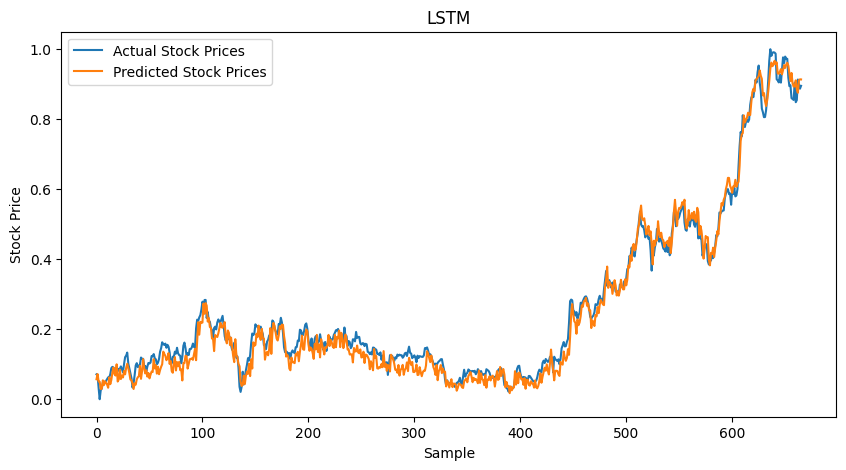

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('LSTM')
plt.legend()
plt.show()

## hyper-parameter optim

In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=32)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    # Data dimensions (input_dim, output_dim, seq_dim)
    input_dim = len(X)
    output_dim = predict_forward
    seq_dim = window_size

    # Initialize the LSTM model with the suggested hyperparameters
    model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

    # Define the MSE loss function and the optimizer
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)  # Permute to shape (batch_size, num_features, sequence_length)
            loss_mse = criterion_mse(outputs.squeeze(), targets)
            loss_mse.backward()
            optimizer.step()

        # Report validation loss at each epoch
        val_loss = validate(model, X_test, y_test)
        trial.report(val_loss, epoch)

        # Prune the trial if it's not promising
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_loss

# Validation function to evaluate the model on the validation set
def validate(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    with torch.no_grad():
        test_outputs = model(X_test)
        lstm_mse = criterion_mse(test_outputs.squeeze(), y_test)
        lstm_mae = criterion_mae(test_outputs.squeeze(), y_test)
        predictions = test_outputs.squeeze().numpy()

    return lstm_mse  # Return MSE loss for optimization

# Optuna study definition
study = optuna.create_study(direction='minimize')  # Minimize validation MSE loss
study.optimize(objective, n_trials=50)  # Number of trials to run

# Display the best trial hyperparameters and value
best_trial = study.best_trial

print(f'Best trial hyperparameters: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.6f}')

## TCN

In [ ]:
class CausalConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation=1):
        super(CausalConv1d, self).__init__()
        self.padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation)

    def forward(self, x):
        out = self.conv(x)
        return out[:, :, :-self.padding]

class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, dropout):
        super(TemporalBlock, self).__init__()
        self.conv1 = CausalConv1d(in_channels, out_channels, kernel_size, dilation=dilation)
        self.conv2 = CausalConv1d(out_channels, out_channels, kernel_size, dilation=dilation)
        # Apply weight_norm to the Conv1d layers within CausalConv1d
        weight_norm(self.conv1.conv)
        weight_norm(self.conv2.conv)
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None
        if self.downsample is not None:
            self.downsample = weight_norm(self.downsample)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.dropout(out)
        out = self.relu(self.conv2(out))
        out = self.dropout(out)

        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN(nn.Module):
    def __init__(self, num_inputs, num_channels, num_classes, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = TemporalConvNet(num_inputs, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        o = self.sigmoid(o)

        return o

In [ ]:
# Parameters
output_size = 1  # Predicting a single value
num_channels = [128]  # Number of channels in each TemporalBlock
kernel_size = 2
dropout = 0.1
num_epochs = 150

In [ ]:
input_size = X_train.shape[2]  # Number of input features

# Create model
model = TCN(input_size, num_channels, output_size, kernel_size, dropout)
criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:

        outputs = model(inputs.permute(0, 2, 1))  # Permute to shape (batch_size, num_features, sequence_length)
        loss_mse = criterion_mse(outputs.squeeze(), targets)
        loss_mae = criterion_mae(outputs.squeeze(), targets)
        loss_mse.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0 and epoch !=0:
      print(f'Epoch {epoch+1}/{num_epochs}, MSE Loss: {loss_mse:.4f}, MAE Loss: {loss_mae:.4f}')

Epoch 11/150, MSE Loss: 0.0007, MAE Loss: 0.0186
Epoch 21/150, MSE Loss: 0.0007, MAE Loss: 0.0195
Epoch 31/150, MSE Loss: 0.0004, MAE Loss: 0.0145
Epoch 41/150, MSE Loss: 0.0003, MAE Loss: 0.0123
Epoch 51/150, MSE Loss: 0.0002, MAE Loss: 0.0116
Epoch 61/150, MSE Loss: 0.0004, MAE Loss: 0.0130
Epoch 71/150, MSE Loss: 0.0002, MAE Loss: 0.0133
Epoch 81/150, MSE Loss: 0.0001, MAE Loss: 0.0070
Epoch 91/150, MSE Loss: 0.0004, MAE Loss: 0.0151
Epoch 101/150, MSE Loss: 0.0003, MAE Loss: 0.0122
Epoch 111/150, MSE Loss: 0.0002, MAE Loss: 0.0125
Epoch 121/150, MSE Loss: 0.0003, MAE Loss: 0.0124
Epoch 131/150, MSE Loss: 0.0011, MAE Loss: 0.0186
Epoch 141/150, MSE Loss: 0.0004, MAE Loss: 0.0133


In [ ]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test.permute(0, 2, 1))
    tcn_mse = criterion_mse(test_outputs.squeeze(), y_test.reshape(-1,))
    tcn_mae = criterion_mae(test_outputs.squeeze(), y_test.reshape(-1,))
    predictions = test_outputs.squeeze().numpy()

print(f'Test MSE Loss: {tcn_mse:.6f}, Test MAE Loss: {tcn_mae:.6f}')

Test MSE Loss: 0.000605, Test MAE Loss: 0.019134


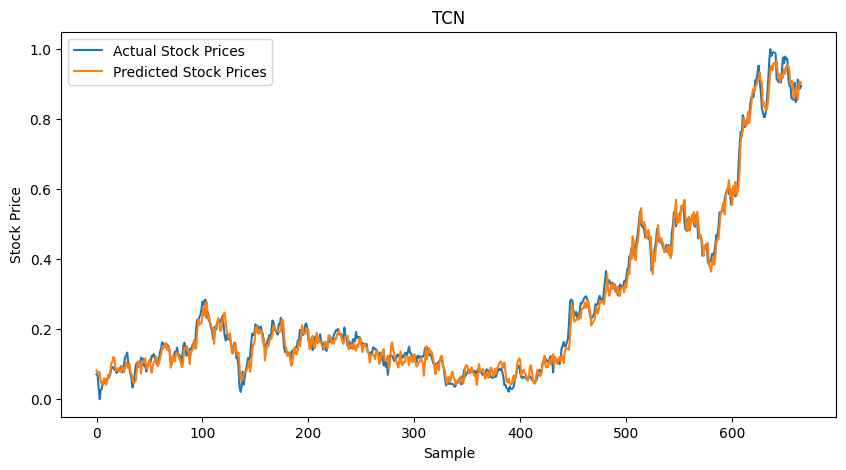

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('TCN')
plt.legend()
plt.show()

# hyperparameter optim

In [ ]:
# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for tuning
    num_channels = trial.suggest_categorical('num_channels', [[32], [64], [128], [64, 64], [128, 128]])  # Different possible architectures
    kernel_size = trial.suggest_int('kernel_size', 2, 5)
    dropout = trial.suggest_float('dropout', 0.05, 0.5)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    # Data dimensions (input_size, output_size) are placeholders
    input_size = len(X)
    output_size = predict_forward

    # Initialize the TCN model with the suggested hyperparameters
    model = TCN(input_size, num_channels, output_size, kernel_size, dropout)

    # Define loss functions and optimizer
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    num_epochs = 50
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            # Permuting the input to (batch_size, num_features, sequence_length) for the TCN
            outputs = model(inputs.permute(0, 2, 1))
            loss_mse = criterion_mse(outputs.squeeze(), targets)
            loss_mse.backward()
            optimizer.step()

        # Report validation loss at each epoch
        val_loss = validate(model, X_test, y_test)  # Assuming a validation function exists
        trial.report(val_loss, epoch)

        # Prune the trial if it's not promising
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_loss

# Validation function to evaluate the model on the validation set
def validate(model, X_test, y_test):
    model.eval()
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    with torch.no_grad():
        test_outputs = model(X_test.permute(0, 2, 1))
        tcn_mse = criterion_mse(test_outputs.squeeze(), y_test)
        tcn_mae = criterion_mae(test_outputs.squeeze(), y_test)
        predictions = test_outputs.squeeze().numpy()
    return tcn_mse

# Optuna study definition
study = optuna.create_study(direction='minimize')  # Minimize the validation MSE loss
study.optimize(objective, n_trials=50)  # Number of trials

# Display the best hyperparameters found
best_trial = study.best_trial
print(f'Best trial: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.6f}')

## SVR

In [73]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
svr = SVR(kernel='linear', C=10)
svr.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_svr = svr.predict(X_test.reshape(X_test.shape[0], -1))
mse_svr = mean_squared_error(y_test, pred_svr)
mae_svr = mean_absolute_error(y_test, pred_svr)
mse_svr, mae_svr

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.0018531278447262013, 0.037535719661799215)

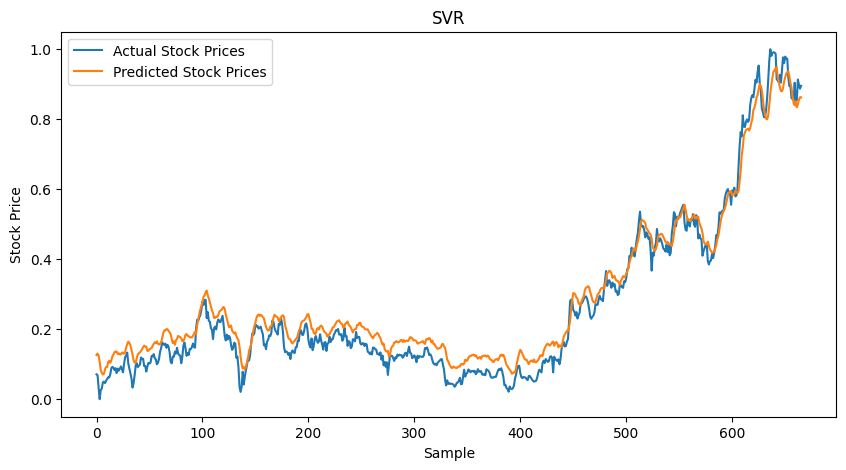

In [75]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(pred_svr, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('SVR')
plt.legend()
plt.show()

### GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

In [56]:
svr = SVR()

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5]
}


X_train_reshaped = X_train.reshape(X_train.shape[0], -1).numpy()
X_test_reshaped = X_test.reshape(X_test.shape[0], -1).numpy()

y_train_reshaped = y_train.squeeze().numpy()
y_test_reshaped = y_test.squeeze().numpy()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_reshaped, y_train_reshaped)

# Retrieve the best model and its parameters
best_svr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model to predict
pred_svr = best_svr.predict(X_test_reshaped)

# Evaluate the performance
mse_svr = mean_squared_error(y_test_reshaped, pred_svr)
mae_svr = mean_absolute_error(y_test_reshaped, pred_svr)

print("Best Parameters:", best_params)
print("MSE (SVR):", mse_svr)
print("MAE (SVR):", mae_svr)

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
MSE (SVR): 0.0018531278447262013
MAE (SVR): 0.037535719661799215


## RF

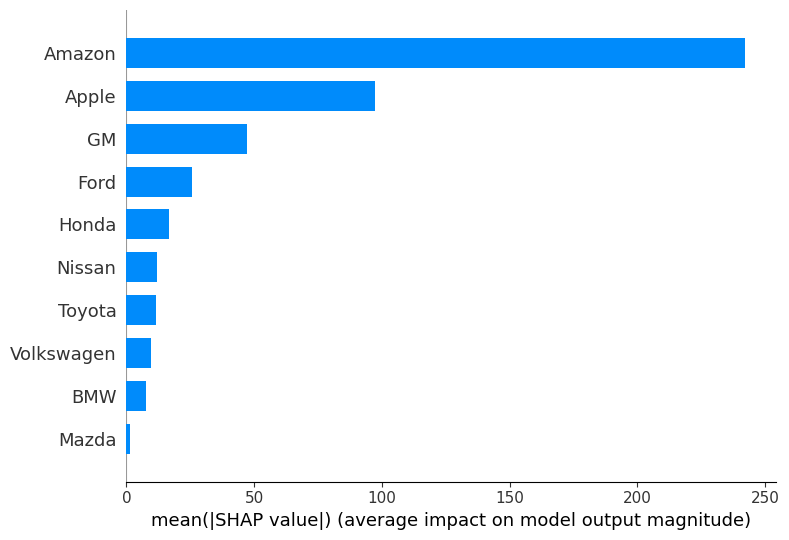

In [59]:
# Calculate Shapley values

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import shap

data = stock_data[X]

# Separate features and target
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RF = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, min_samples_split=10, n_estimators=300)
RF.fit(X_train, y_train)

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type='bar')

In [70]:
RF = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, min_samples_split=10, n_estimators=300)
RF.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_RF = RF.predict(X_test.reshape(X_test.shape[0], -1))
mse_RF = mean_squared_error(y_test, pred_RF)
mae_RF = mean_absolute_error(y_test, pred_RF)
mse_RF, mae_RF

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.0005016890876916616, 0.016531123836891225)

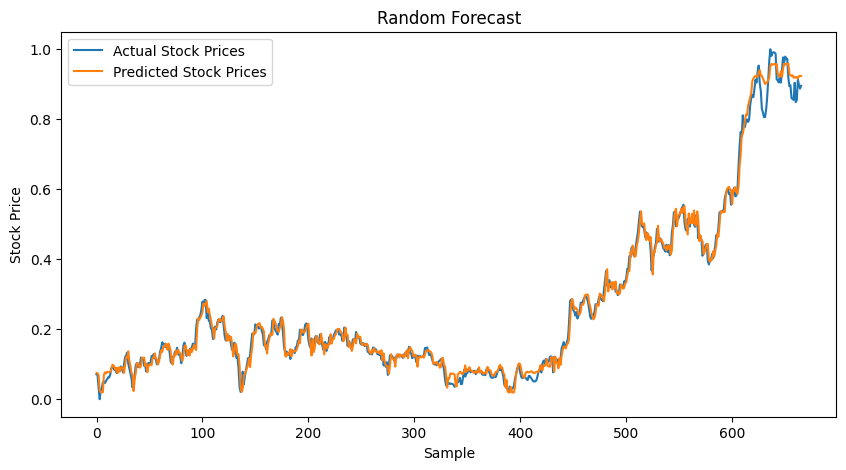

In [72]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(pred_RF, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('Random Forecast')
plt.legend()
plt.show()

### GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],          # Number of trees in the forest
    'max_depth': [10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider for the best split
}


X_train_reshaped = X_train.reshape(X_train.shape[0], -1).numpy()
X_test_reshaped = X_test.reshape(X_test.shape[0], -1).numpy()

y_train_reshaped = y_train.squeeze().numpy()
y_test_reshaped = y_test.squeeze().numpy()


# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_reshaped, y_train_reshaped)

# Retrieve the best model and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model to predict
pred_rf = best_rf.predict(X_test_reshaped)

# Evaluate the performance
mse_rf = mean_squared_error(y_test_reshaped, pred_rf)
mae_rf = mean_absolute_error(y_test_reshaped, pred_rf)

print("Best Parameters:", best_params)
print("MSE (Random Forest):", mse_rf)
print("MAE (Random Forest):", mae_rf)

### Statistical Analysis

In [ ]:
import yfinance as yf

start_date = "2015-05-01"
end_date = "2024-05-08"

In [ ]:
def import_stock_price(ticker, start_date, end_date):
    stock_data = yf.Ticker(ticker)
    stock_price = stock_data.history(start=start_date, end=end_date)
    stock_price.index = pd.to_datetime(stock_price.index)
    stock_price['date'] = stock_price.index.date
    stock_price.reset_index(drop=True, inplace=True)
    return stock_price

In [ ]:
toyota_data = import_stock_price('7203.T', start_date, end_date)
toyota_data.rename(columns={'Close': 'toyota'}, inplace=True)
toyota_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
toyota_data

,toyota,date
0,1250.183105,2015-05-01
1,1234.997314,2015-05-07
2,1244.770386,2015-05-08
3,1238.154785,2015-05-11
4,1245.521851,2015-05-12
...,...,...
2217,3458.505371,2024-04-26
2218,3584.627441,2024-04-30
2219,3552.111572,2024-05-01
2220,3528.463623,2024-05-02


In [ ]:
honda_data = import_stock_price('7267.T', start_date, end_date)
honda_data.rename(columns={'Close': 'honda'}, inplace=True)
honda_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
honda_data

,honda,date
0,983.718933,2015-05-01
1,981.199280,2015-05-07
2,1003.875305,2015-05-08
3,1010.354309,2015-05-11
4,1000.876099,2015-05-12
...,...,...
2217,1713.647339,2024-04-26
2218,1773.852539,2024-04-30
2219,1749.868408,2024-05-01
2220,1745.463135,2024-05-02


In [ ]:
nissan_data = import_stock_price('7201.T', start_date, end_date)
nissan_data.rename(columns={'Close': 'nissan'}, inplace=True)
nissan_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
nissan_data

,nissan,date
0,955.034241,2015-05-01
1,940.045837,2015-05-07
2,949.653625,2015-05-08
3,965.410950,2015-05-11
4,967.332458,2015-05-12
...,...,...
2217,549.000000,2024-04-26
2218,581.700012,2024-04-30
2219,579.299988,2024-05-01
2220,580.000000,2024-05-02


In [ ]:
mazda_data = import_stock_price('7261.T', start_date, end_date)
mazda_data.rename(columns={'Close': 'mazda'}, inplace=True)
mazda_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
mazda_data

,mazda,date
0,1867.137207,2015-05-01
1,1905.789307,2015-05-07
2,1939.708374,2015-05-08
3,1973.233276,2015-05-11
4,1979.149658,2015-05-12
...,...,...
2217,1640.826782,2024-04-26
2218,1764.035400,2024-04-30
2219,1748.389893,2024-05-01
2220,1691.674805,2024-05-02


In [ ]:
ford_data = import_stock_price('F', start_date, end_date)
ford_data.rename(columns={'Close': 'ford'}, inplace=True)
ford_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
ford_data

,ford,date
0,9.614622,2015-05-01
1,9.596377,2015-05-04
2,9.444345,2015-05-05
3,9.413936,2015-05-06
4,9.432180,2015-05-07
...,...,...
2265,11.709630,2024-05-01
2266,11.987973,2024-05-02
2267,11.930386,2024-05-03
2268,11.997573,2024-05-06


In [ ]:
GM_data = import_stock_price('GM', start_date, end_date)
GM_data.rename(columns={'Close': 'GM'}, inplace=True)
GM_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
GM_data

,GM,date
0,27.919630,2015-05-01
1,27.903872,2015-05-04
2,27.596449,2015-05-05
3,27.407278,2015-05-06
4,27.493986,2015-05-07
...,...,...
2265,44.242466,2024-05-01
2266,44.441437,2024-05-02
2267,44.630470,2024-05-03
2268,44.829445,2024-05-06


In [ ]:
bmw_data = import_stock_price('BMW.DE', start_date, end_date)
bmw_data.rename(columns={'Close': 'bmw'}, inplace=True)
bmw_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
bmw_data

,bmw,date
0,63.355339,2015-05-04
1,63.206959,2015-05-05
2,61.782574,2015-05-06
3,62.079319,2015-05-07
4,64.987434,2015-05-08
...,...,...
2288,96.476234,2024-04-30
2289,96.005394,2024-05-02
2290,96.523323,2024-05-03
2291,97.041260,2024-05-06


In [ ]:
vw_data = import_stock_price('VOW.DE', start_date, end_date)
vw_data.rename(columns={'Close': 'vw'}, inplace=True)
vw_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
vw_data

,vw,date
0,140.104126,2015-05-04
1,138.656570,2015-05-05
2,136.957199,2015-05-06
3,138.845398,2015-05-07
4,141.835052,2015-05-08
...,...,...
2288,124.201447,2024-04-30
2289,123.546776,2024-05-02
2290,124.575539,2024-05-03
2291,125.978416,2024-05-06


In [ ]:
BYD_data = import_stock_price('1211.HK', start_date, end_date)
BYD_data.rename(columns={'Close': 'BYD'}, inplace=True)
BYD_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
BYD_data

,BYD,date
0,45.538651,2015-05-04
1,45.395149,2015-05-05
2,44.821129,2015-05-06
3,43.529598,2015-05-07
4,45.012466,2015-05-08
...,...,...
2217,212.379150,2024-04-30
2218,221.638718,2024-05-02
2219,223.017807,2024-05-03
2220,222.623779,2024-05-06


In [ ]:
apple_data = import_stock_price('AAPL', start_date, end_date)
apple_data.rename(columns={'Close': 'AAPL'}, inplace=True)
apple_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
apple_data

,AAPL,date
0,28.829765,2015-05-01
1,28.773870,2015-05-04
2,28.125511,2015-05-05
3,27.948883,2015-05-06
4,28.121759,2015-05-07
...,...,...
2265,168.689621,2024-05-01
2266,172.406174,2024-05-02
2267,182.718842,2024-05-03
2268,181.054886,2024-05-06


In [ ]:
amazon_data = import_stock_price('AMZN', start_date, end_date)
amazon_data.rename(columns={'Close': 'AMZN'}, inplace=True)
amazon_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
amazon_data

,AMZN,date
0,21.143499,2015-05-01
1,21.152000,2015-05-04
2,21.059500,2015-05-05
3,20.955000,2015-05-06
4,21.344000,2015-05-07
...,...,...
2265,179.000000,2024-05-01
2266,184.720001,2024-05-02
2267,186.210007,2024-05-03
2268,188.699997,2024-05-06


In [ ]:
tesla_data = import_stock_price('TSLA', start_date, end_date)
tesla_data.rename(columns={'Close': 'TSLA'}, inplace=True)
tesla_data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
tesla_data

,TSLA,date
0,15.068667,2015-05-01
1,15.367333,2015-05-04
2,15.530000,2015-05-05
3,15.362000,2015-05-06
4,15.786667,2015-05-07
...,...,...
2265,179.990005,2024-05-01
2266,180.009995,2024-05-02
2267,181.190002,2024-05-03
2268,184.759995,2024-05-06


In [ ]:
stock_price = pd.merge(toyota_data, honda_data, on='date')
stock_price = pd.merge(stock_price, nissan_data, on='date')
stock_price = pd.merge(stock_price, mazda_data, on='date')
stock_price = pd.merge(stock_price, ford_data, on='date')
stock_price = pd.merge(stock_price, GM_data, on='date')
stock_price = pd.merge(stock_price, bmw_data, on='date')
stock_price = pd.merge(stock_price, vw_data, on='date')
stock_price = pd.merge(stock_price, BYD_data, on='date')
stock_price = pd.merge(stock_price, apple_data, on='date')
stock_price = pd.merge(stock_price, amazon_data, on='date')
stock_price = pd.merge(stock_price, tesla_data, on='date')
stock_price

,toyota,date,honda,nissan,mazda,ford,GM,bmw,vw,BYD,AAPL,AMZN,TSLA
0,1234.997314,2015-05-07,981.199280,940.045837,1905.789307,9.432180,27.493986,62.079319,138.845398,43.529598,28.121759,21.344000,15.786667
1,1244.770386,2015-05-08,1003.875305,949.653625,1939.708374,9.529483,27.840807,64.987434,141.835052,45.012466,28.651596,21.684500,15.774000
2,1238.154785,2015-05-11,1010.354309,965.410950,1973.233276,9.517320,27.761982,64.868736,141.835052,46.925861,28.359737,21.642500,15.966000
3,1245.521851,2015-05-12,1000.876099,967.332458,1979.149658,9.462586,27.383625,63.117931,137.429260,45.442986,28.258715,21.551001,16.316000
4,1232.291138,2015-05-13,1005.675476,958.108704,1988.220947,9.371367,27.430923,62.257374,137.303391,45.155975,28.290140,21.343500,16.212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,3445.696045,2024-04-25,1709.242065,546.700012,1632.026123,12.515867,45.386578,98.924637,128.223038,200.755432,169.277496,173.669998,170.179993
2034,3458.505371,2024-04-26,1713.647339,549.000000,1640.826782,12.275916,45.605453,100.195923,130.280579,209.620987,168.689621,179.619995,168.289993
2035,3584.627441,2024-04-30,1773.852539,581.700012,1764.035400,11.661639,44.302158,96.476234,124.201447,212.379150,169.715912,175.000000,183.279999
2036,3528.463623,2024-05-02,1745.463135,580.000000,1691.674805,11.987973,44.441437,96.005394,123.546776,221.638718,172.406174,184.720001,180.009995


### Cointegration

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# to check whether the stock price of each company is stationary or not
name_list = stock_price.columns.to_list()
name_list.remove('date')

for name in name_list:
    result = adfuller(stock_price[name])
    print("Company Name: ", name)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("===============================")

Company Name:  toyota
ADF Statistic: 2.047219
p-value: 0.998731
Company Name:  honda
ADF Statistic: -0.059004
p-value: 0.953372
Company Name:  nissan
ADF Statistic: -1.668692
p-value: 0.447311
Company Name:  mazda
ADF Statistic: -2.281223
p-value: 0.178096
Company Name:  ford
ADF Statistic: -2.249154
p-value: 0.188891
Company Name:  GM
ADF Statistic: -2.106685
p-value: 0.241835
Company Name:  bmw
ADF Statistic: -0.765616
p-value: 0.829014
Company Name:  vw
ADF Statistic: -1.898495
p-value: 0.332769
Company Name:  BYD
ADF Statistic: -1.121634
p-value: 0.706368
Company Name:  AAPL
ADF Statistic: -0.190609
p-value: 0.939632
Company Name:  AMZN
ADF Statistic: -0.857033
p-value: 0.801793
Company Name:  TSLA
ADF Statistic: -1.449148
p-value: 0.558501


In [ ]:
stock_price['toyota_log'] = np.log(stock_price['toyota']/stock_price['toyota'][0])
stock_price['honda_log'] = np.log(stock_price['honda']/stock_price['honda'][0])
stock_price['nissan_log'] = np.log(stock_price['nissan']/stock_price['nissan'][0])
stock_price['mazda_log'] = np.log(stock_price['mazda']/stock_price['mazda'][0])
stock_price['ford_log'] = np.log(stock_price['ford']/stock_price['ford'][0])
stock_price['GM_log'] = np.log(stock_price['GM']/stock_price['GM'][0])
stock_price['bmw_log'] = np.log(stock_price['bmw']/stock_price['bmw'][0])
stock_price['vw_log'] = np.log(stock_price['vw']/stock_price['vw'][0])
stock_price['BYD_log'] = np.log(stock_price['BYD']/stock_price['BYD'][0])
stock_price['apple_log'] = np.log(stock_price['AAPL']/stock_price['AAPL'][0])
stock_price['amazon_log'] = np.log(stock_price['AMZN']/stock_price['AMZN'][0])
stock_price['tesla_log'] = np.log(stock_price['TSLA']/stock_price['TSLA'][0])
stock_price

,toyota,date,honda,nissan,mazda,ford,GM,bmw,vw,BYD,...,nissan_log,mazda_log,ford_log,GM_log,bmw_log,vw_log,BYD_log,apple_log,amazon_log,tesla_log
0,1234.997314,2015-05-07,981.199280,940.045837,1905.789307,9.432180,27.493986,62.079319,138.845398,43.529598,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1244.770386,2015-05-08,1003.875305,949.653625,1939.708374,9.529483,27.840807,64.987434,141.835052,45.012466,...,0.010169,0.017641,0.010263,0.012536,0.045781,0.021304,0.033498,0.018666,0.015827,-0.000803
2,1238.154785,2015-05-11,1010.354309,965.410950,1973.233276,9.517320,27.761982,64.868736,141.835052,46.925861,...,0.026625,0.034777,0.008986,0.009700,0.043953,0.021304,0.075128,0.008427,0.013888,0.011296
3,1245.521851,2015-05-12,1000.876099,967.332458,1979.149658,9.462586,27.383625,63.117931,137.429260,45.442986,...,0.028614,0.037771,0.003218,-0.004022,0.016592,-0.010252,0.043017,0.004858,0.009652,0.032981
4,1232.291138,2015-05-13,1005.675476,958.108704,1988.220947,9.371367,27.430923,62.257374,137.303391,45.155975,...,0.019033,0.042344,-0.006468,-0.002296,0.002864,-0.011168,0.036681,0.005970,-0.000023,0.026586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,3445.696045,2024-04-25,1709.242065,546.700012,1632.026123,12.515867,45.386578,98.924637,128.223038,200.755432,...,-0.542028,-0.155074,0.282870,0.501249,0.465945,-0.079590,1.528646,1.794996,2.096386,2.377691
2034,3458.505371,2024-04-26,1713.647339,549.000000,1640.826782,12.275916,45.605453,100.195923,130.280579,209.620987,...,-0.537830,-0.149696,0.263512,0.506060,0.478715,-0.063671,1.571860,1.791517,2.130073,2.366523
2035,3584.627441,2024-04-30,1773.852539,581.700012,1764.035400,11.661639,44.302158,96.476234,124.201447,212.379150,...,-0.479974,-0.077292,0.212177,0.477066,0.440884,-0.111456,1.584932,1.797582,2.104015,2.451849
2036,3528.463623,2024-05-02,1745.463135,580.000000,1691.674805,11.987973,44.441437,96.005394,123.546776,221.638718,...,-0.482901,-0.119177,0.239777,0.480205,0.435991,-0.116741,1.627608,1.813310,2.158071,2.433847


In [ ]:
def tls_stock_regression(stock1, stock2):
    """
    Perform Total Least Squares regression of stock1 on stock2 and return the residuals for DF test.

    Parameters:
    stock1 (numpy array): First stock prices (dependent variable)
    stock2 (numpy array): Second stock prices (independent variable)

    Returns:
    residuals (numpy array): Residuals of the TLS regression
    adf_result (dict): ADF test results on the residuals
    """
    # Step 1: Augment the matrices
    X = np.column_stack((stock2, np.ones(len(stock2))))  # Independent variable + intercept (for constant)
    y = stock1  # Dependent variable

    # Step 2: Perform SVD on the augmented matrix [X|y]
    Z = np.column_stack((X, y))  # Augmented matrix
    U, s, Vt = np.linalg.svd(Z, full_matrices=False)

    # Step 3: Get the right singular vector corresponding to the smallest singular value
    V = Vt.T
    v_xy = V[:-1, -1]  # Coefficients for X (stock2)
    v_y = V[-1, -1]    # Coefficient for y (stock1)

    # Step 4: Calculate the regression coefficients (TLS regression)
    beta = -v_xy / v_y

    # Extract slope and intercept
    slope, intercept = beta[0], beta[1]

    # Step 5: Calculate predicted values and residuals
    predicted_stock1 = slope * stock2 + intercept
    residuals = stock1 - predicted_stock1

    # Step 6: Perform ADF test on the residuals
    adf_test = adfuller(residuals)
    adf_result = {
        'ADF Statistic': adf_test[0],
        'p-value': adf_test[1],
        'Used lags': adf_test[2],
        'Number of observations': adf_test[3],
        'Critical Values': adf_test[4]
    }

    # Return residuals and ADF result
    return residuals, adf_result

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

Company Name:  honda_log
{'ADF Statistic': -2.7724479353735254, 'p-value': 0.06231843654026123, 'Used lags': 9, 'Number of observations': 2028, 'Critical Values': {'1%': -3.4335785978471383, '5%': -2.86296623151218, '10%': -2.5675292628740047}}
Company Name:  nissan_log
{'ADF Statistic': -2.142452680644976, 'p-value': 0.22779017597951828, 'Used lags': 0, 'Number of observations': 2037, 'Critical Values': {'1%': -3.433564315018763, '5%': -2.862959925476948, '10%': -2.5675259052472796}}
Company Name:  mazda_log
{'ADF Statistic': -1.9786509808816184, 'p-value': 0.29601162957530536, 'Used lags': 0, 'Number of observations': 2037, 'Critical Values': {'1%': -3.433564315018763, '5%': -2.862959925476948, '10%': -2.5675259052472796}}
Company Name:  ford_log
{'ADF Statistic': -2.252524759896987, 'p-value': 0.18773687738391903, 'Used lags': 10, 'Number of observations': 2027, 'Critical Values': {'1%': -3.4335801926672382, '5%': -2.8629669356419787, '10%': -2.567529637785797}}
Company Name:  GM_lo

<ipython-input-26-e0c889cc7294>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


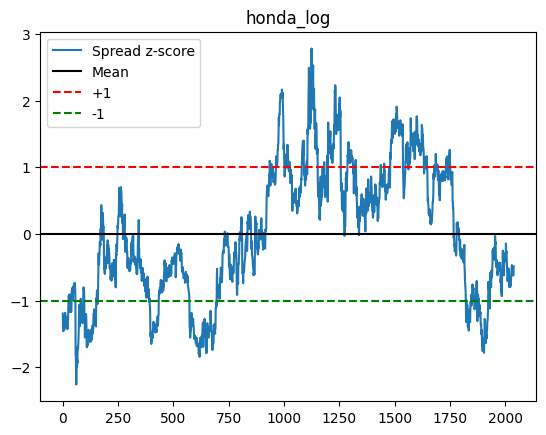

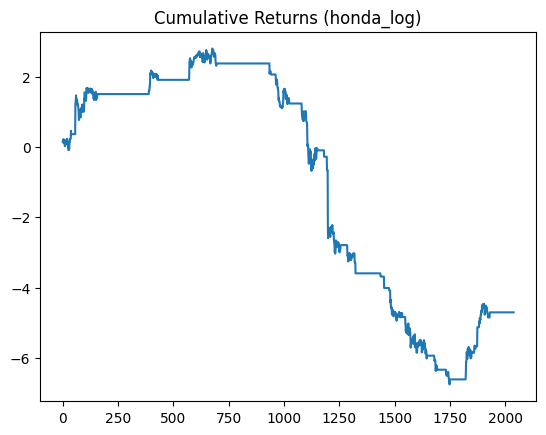

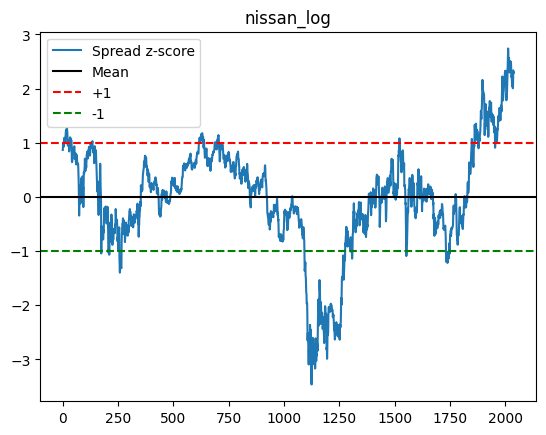

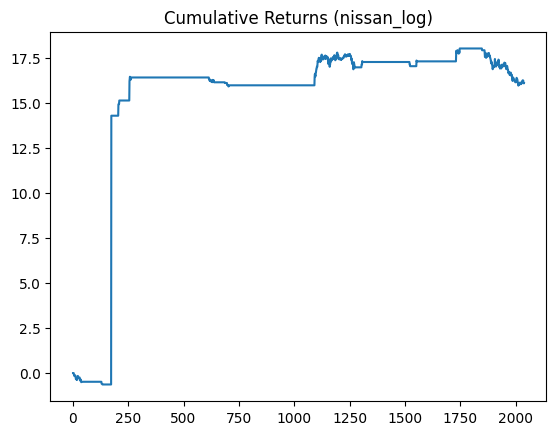

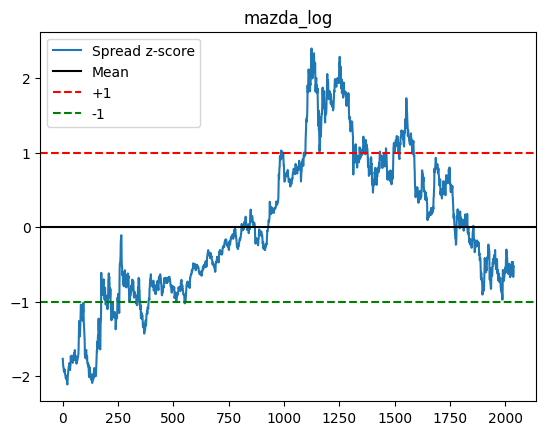

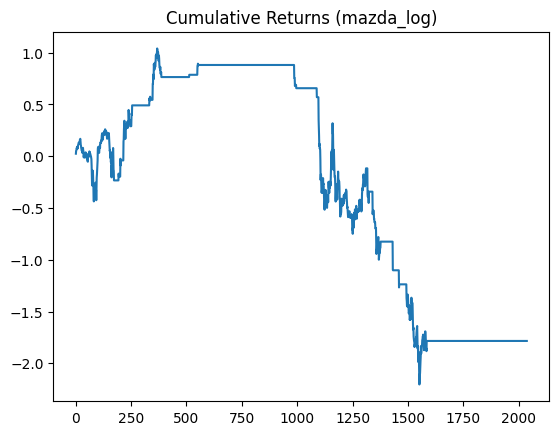

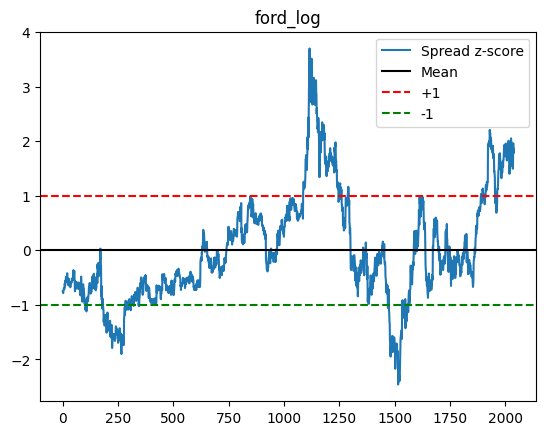

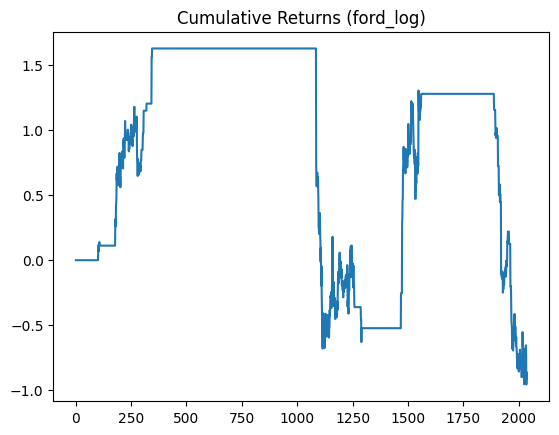

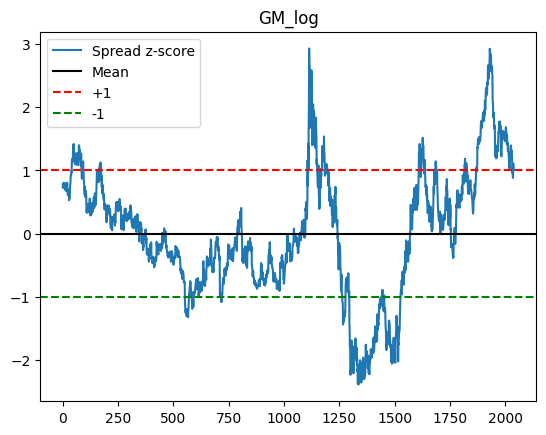

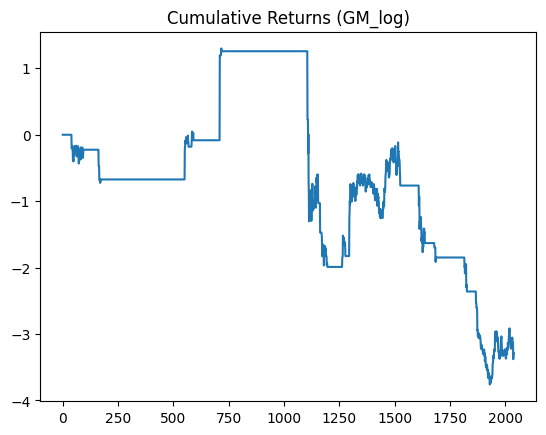

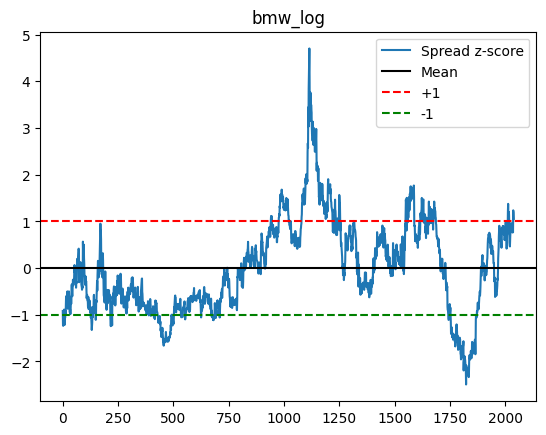

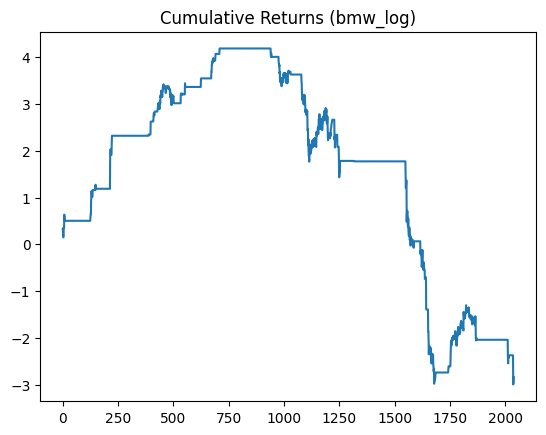

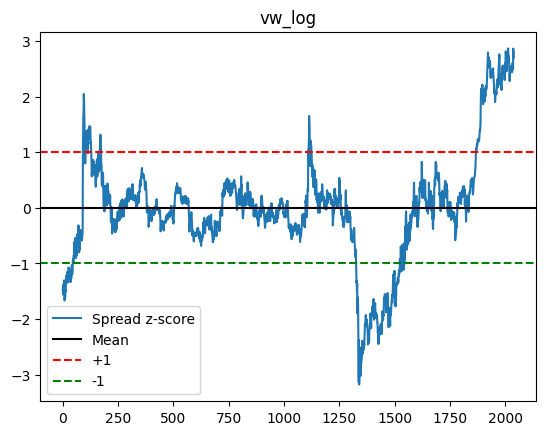

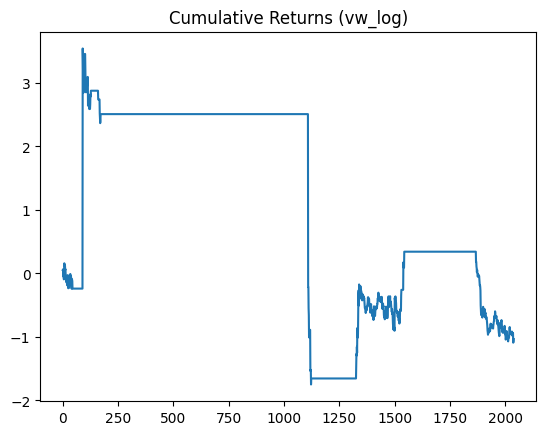

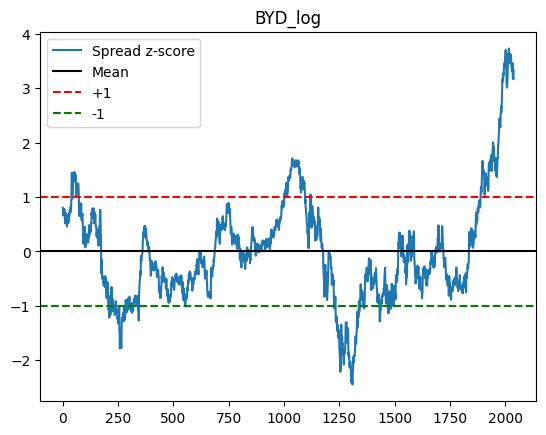

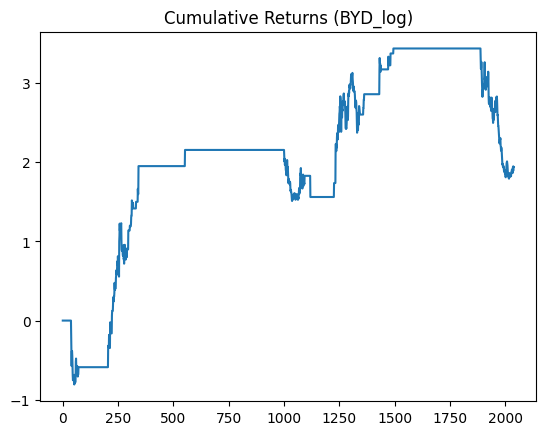

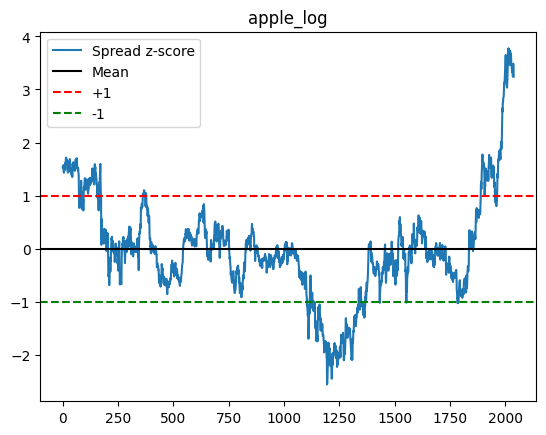

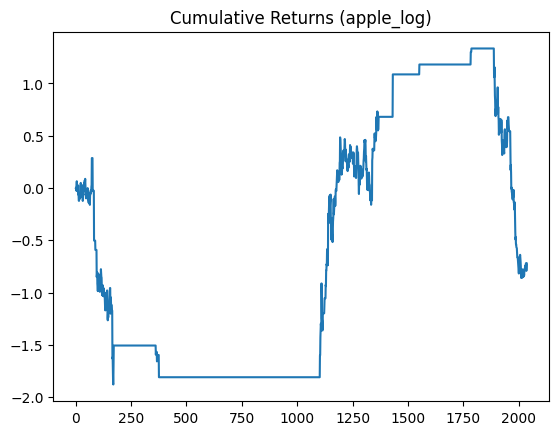

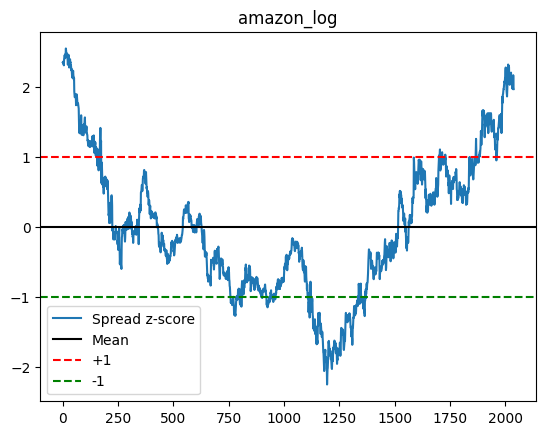

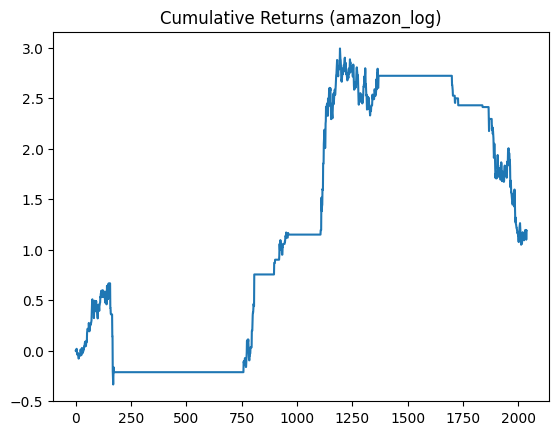

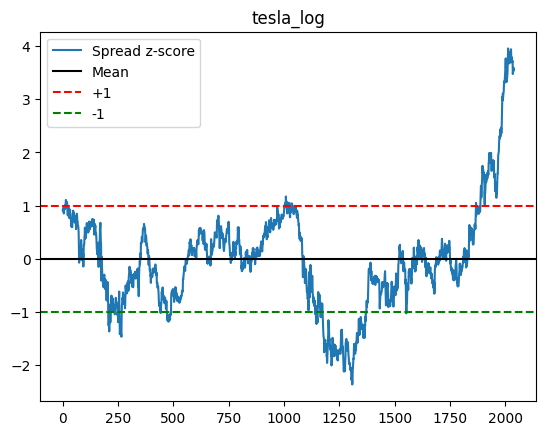

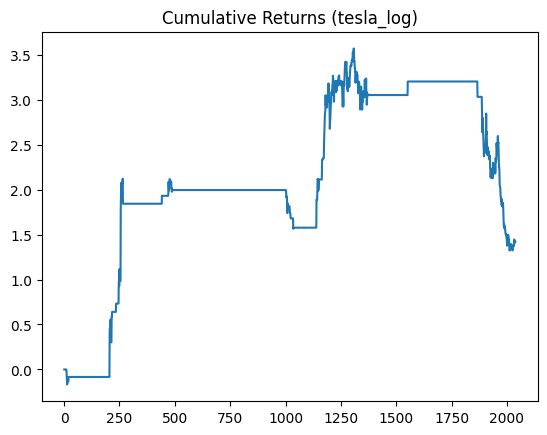

In [ ]:
#regress stock price of toyota with other companies separately

name_list2 = ['honda_log', 'nissan_log', 'mazda_log', 'ford_log', 'GM_log', 'bmw_log', 'vw_log', 'BYD_log', 'apple_log', 'amazon_log','tesla_log']

for name in name_list2:
    residuals, adf_result = tls_stock_regression(stock_price['toyota_log'], stock_price[name])
    print("Company Name: ", name)
    print(adf_result)
    print("==========================================================")

    plt.figure()
    zscore(residuals).plot(title=name)
    plt.axhline(zscore(residuals).mean(), color='black')
    plt.axhline(1.0, color='red', linestyle='--')
    plt.axhline(-1.0, color='green', linestyle='--')
    plt.legend(['Spread z-score', 'Mean', '+1', '-1'])

    trades = pd.concat([zscore(residuals), residuals], axis=1)
    trades.columns = ["signal", "position"]

    # Add a long and short position at the z-score levels
    trades["side"] = 0.0
    trades.loc[trades.signal <= -1, "side"] = 1
    trades.loc[trades.signal >= 1, "side"] = -1

    returns = trades.position.pct_change() * trades.side
    plt.figure()  # Create a new figure for each plot
    returns.cumsum().plot(title=f"Cumulative Returns ({name})")

You buy the spread when it gets “too low” and sell the spread when it gets “too high.” But what is too low and too high? Use the z-score to normalize the spread and use it as the trade signal.